<h1><center>DEMO - Cálculo de ruta</center></h1>

<img src="LOL.png" alt="Italian Trulli" style="width:914px; height:517px;">

## Procedimiento

1. Recolectar información acerca del destino de los usuarios.
2. Ubicar los puntos de destino sobre un mapa.
3. Agrupamos los puntos según la cercanía entre ellos mismos.
4. Calculamos la ruta que mejor se ajuste.

## Paso 1: Recolectar información acerca del destino de los usuarios

<img src="IMG2.png" alt="Italian Trulli" style="width:290px; height:480px;">

In [1]:
import random
import pandas as pd
import numpy as np
import decimal
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
#matplotlib inline

table = pd.read_excel("Demo.xlsx")

table

,id_usuario,name_usuario,id_compra,name_event,cat_event,event_location,price,pay_method,timestamp_purchase,lat,long
0,1334689902,Gaporigo,SF1,Santa Fe - Equidad,Fútbol,260,0,credit,1562882431,4.636116,-74.123685
1,1827268229,JotunR,SF2,Santa Fe - Equidad,Fútbol,25780,0,efecty,1562883723,4.622446,-74.122779
2,1831774571,marianglik,SF3,Santa Fe - Equidad,Fútbol,14789,0,payu,1562836516,4.717203,-74.080138
3,1729955500,chhubbydumpling,SF4,Santa Fe - Equidad,Fútbol,33304,0,credit,1562871192,4.653107,-74.054722
4,1226803630,elpablete,SF5,Santa Fe - Equidad,Fútbol,29368,0,credit,1562864392,4.716452,-74.049790
5,1447528116,RCam72,SF6,Santa Fe - Equidad,Fútbol,9114,0,efecty,1562823360,4.591541,-74.120359
6,1148302541,Inpapi123,SF7,Santa Fe - Equidad,Fútbol,25191,0,payu,1562890269,4.670214,-74.082159
7,1014238322,Tomani02,SF8,Santa Fe - Equidad,Fútbol,11417,0,payu,1562903020,4.752938,-74.110897
8,1892829966,camilo_castro20,SF9,Santa Fe - Equidad,Fútbol,13396,0,payu,1562836690,4.692624,-74.099439
9,1192195825,chris6a2,SF10,Santa Fe - Equidad,Fútbol,4402,0,payu,1562840121,4.695756,-74.056619


In [2]:
table = table.drop(['id_usuario', 'name_usuario', 'id_compra', 'name_event', 'cat_event', 'event_location', 'price', 'pay_method', 'timestamp_purchase'], axis=1)

table.head()

,lat,long
0,4.636116,-74.123685
1,4.622446,-74.122779
2,4.717203,-74.080138
3,4.653107,-74.054722
4,4.716452,-74.049790


## Paso 2: Ubicar los puntos de destino sobre un mapa

![title](POINTS.png)

(-74.13395633924732, -74.03477666075268, 4.543550156548933, 4.771528843451068)

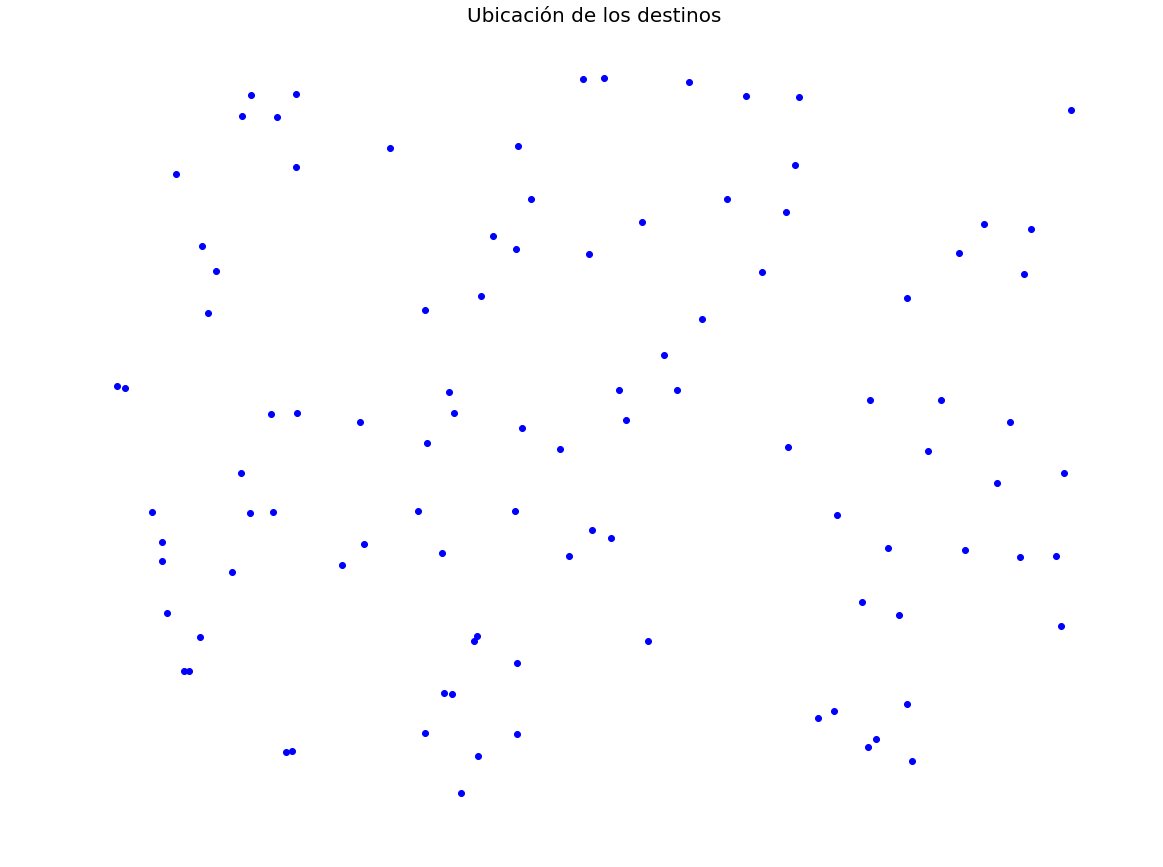

In [81]:
lat_array = table.as_matrix(columns=table.columns[0:1])
long_array = table.as_matrix(columns=table.columns[1:])

fig, ax = plt.subplots(figsize=(20,15))
ax.set_title("Ubicación de los destinos", fontsize=20)
ax.scatter(long_array, lat_array, c='blue')
ax.axis('off')

## Paso 3: Agrupamos los puntos según la cercanía entre ellos mismos

[[  4.72458356 -74.08513662]
 [  4.64718079 -74.1019681 ]
 [  4.63671013 -74.05314713]
 [  4.58272791 -74.09103091]]


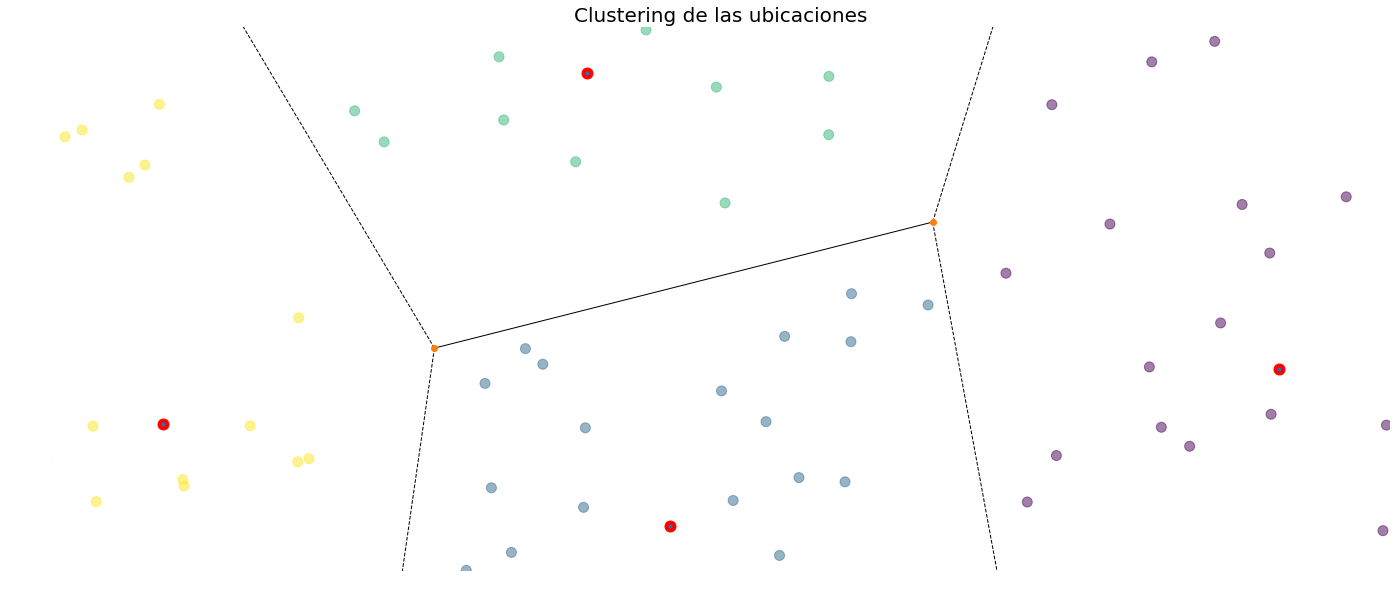

In [82]:
kmeans = KMeans(n_clusters=4).fit(table)
centroids = kmeans.cluster_centers_
print(centroids)

from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(centroids)
voronoi_plot_2d(vor)

plt.title("Clustering de las ubicaciones",fontsize=20)
plt.axis('off')
plt.scatter(table['lat'], table['long'], c= kmeans.labels_.astype(float), s=100, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=120)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 24
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

plt.savefig('voronoi.png', dpi=300)

## Paso 4: Calculamos la ruta que mejor se ajuste

(4.6815138091452715, 4.765895190854729, -74.13795724237058, -74.0256007576294)

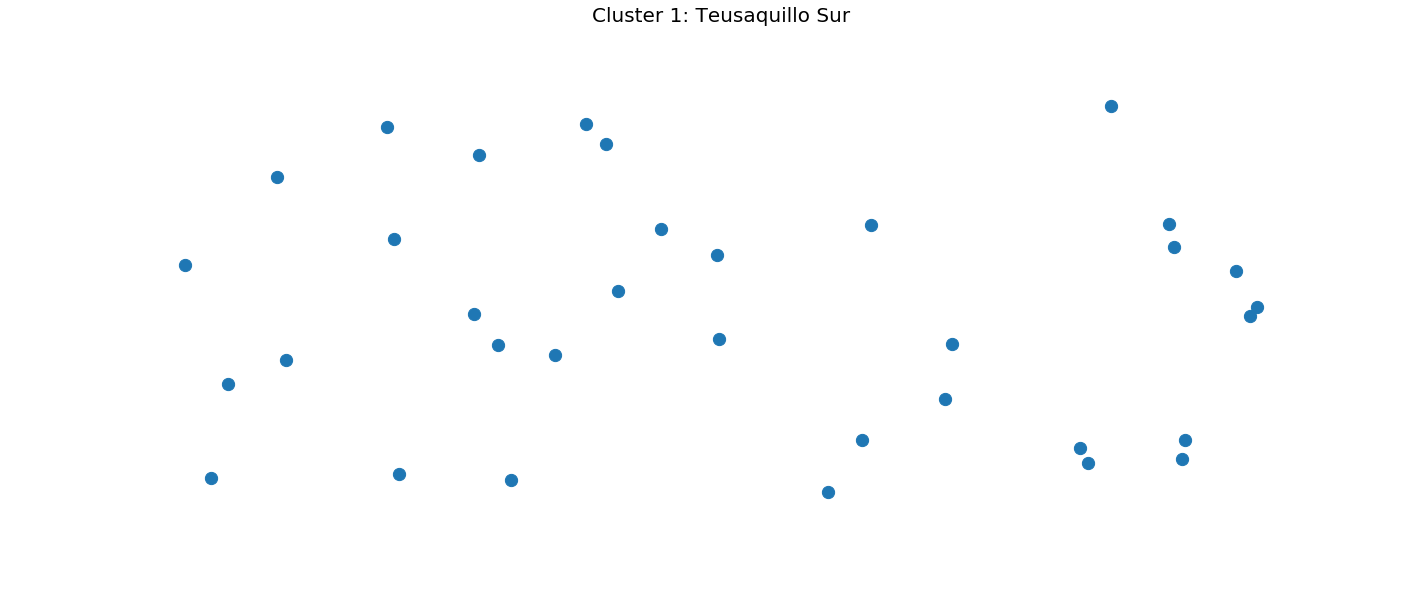

In [83]:
lat_list = []
long_list = []
for index, item in enumerate(kmeans.labels_):
    if (item == 0):
        lat_list.append(table['lat'][index])
        long_list.append(table['long'][index])

plt.title('Cluster 1: Teusaquillo Sur',fontsize=20)
plt.scatter(lat_list, long_list, s=150)
plt.axis('off')

0.023664456748061533
0.01342451576225323


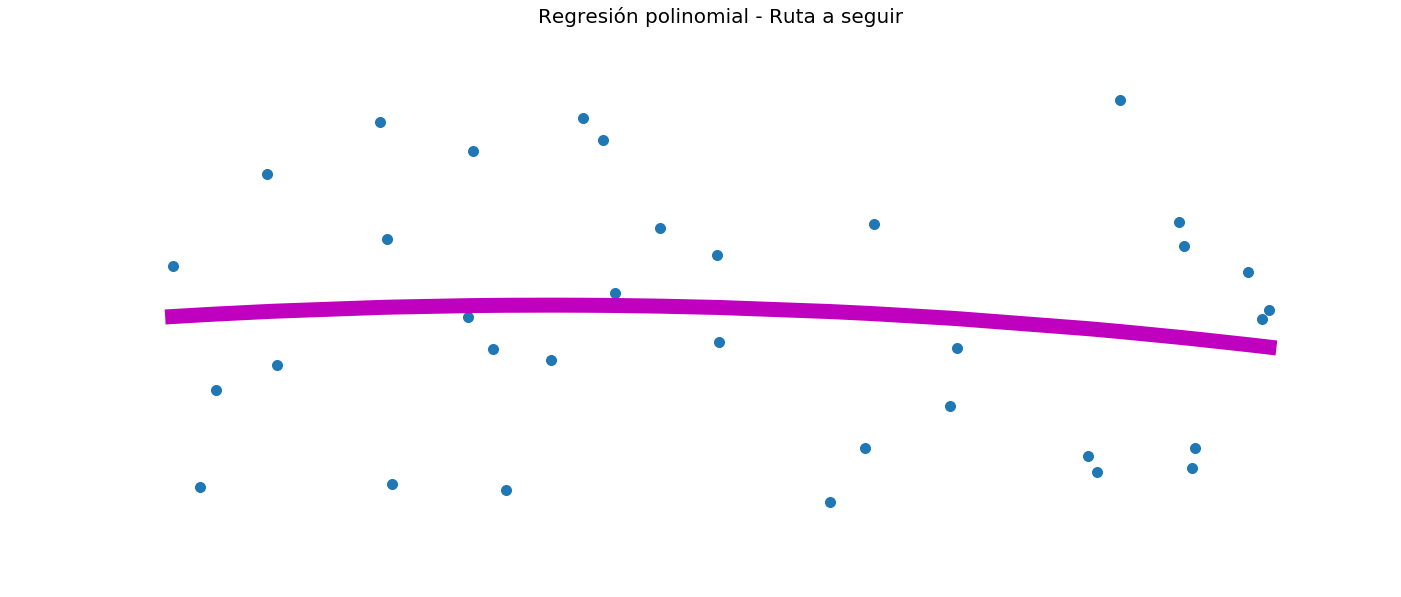

In [114]:
df = pd.DataFrame(list(zip(lat_list, long_list)), 
               columns =['LAT', 'LONG']) 

x = df.as_matrix(columns=df.columns[0:1])
y = df.as_matrix(columns=df.columns[1:])

#x = x[:, np.newaxis]
#y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

from sklearn.linear_model import LinearRegression
import operator

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, y, s=100)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m', linewidth=15)
plt.title('Regresión polinomial - Ruta a seguir', fontsize=20)
plt.axis('off')
plt.show()

plt.savefig('regresion.jpg', dpi=300)

<center><h1>Aún no tenemos carros voladores</center></h1>

![Flying cars](https://media3.giphy.com/media/G9wxtYkK4E1nG/giphy.gif)

## ¡Es necesario ajustar el modelo para que transite por las calles!

<img src="example.png" alt="Italian Trulli">